In [1]:
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
from pprint import pprint
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

workbookPath = 'BOH1/Copy of BOH1 Sim Yvonne Zhang 2024_June 5, 2024_20.01.xlsx'
file_name = os.path.basename(workbookPath)
file_name = os.path.splitext(file_name)[0]
print(file_name)
dir_name = os.path.dirname(workbookPath)
subjectCode = '531'
workbook = openpyxl.load_workbook(workbookPath, data_only=True)
sheetName = workbook.sheetnames[0]
sheet = workbook[sheetName]
data = sheet.values
columns = next(data)
df = pd.DataFrame(data, columns=columns)
nameColumnF = 'Q1.4'
nameColumnG = 'Q1.3'
condition1 = (df[nameColumnG] == 'Fake') | (df[nameColumnF] == 'Person')
condition2 = df[nameColumnG].isna() | df[nameColumnF].isna()
condition3 = df[nameColumnG].eq('') | df[nameColumnF].eq('')
condition4 = (df[nameColumnG] == 'Test') | (df[nameColumnF] == 'Test')
condition5 = df[nameColumnG].eq('asdf') | df[nameColumnF].eq('asdf')
combined_condition = condition1 | condition2 | condition3 | condition4 | condition5
df = df[~combined_condition]
df.head(2)

Copy of BOH1 Sim Yvonne Zhang 2024_June 5, 2024_20.01


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,RecipientFirstName,RecipientEmail,ExternalReference,LocationLatitude,LocationLongitude,DistributionChannel,UserLanguage,Q1.2,Q1.3,Q1.4,Q1.5,Q1.6,Q1.6_111_TEXT,Q1.7,Q2.2_1,Q2.2_2,Q2.2_3,Q2.2_4,Q2.2_5,Q2.2_6,Q2.2_7,Q2.2_8,Q2.2_9,Q2.2_10,Q2.2_11,Q2.5,Q2.6,Q3.1,Q3.2,Q3.3,Q3.4,Q390,Q3.6_Id,Q3.6_Name,Q3.6_Size,Q3.6_Type,gname,fname,uomid,circuit
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,Recipient First Name,Recipient Email,External Data Reference,Location Latitude,Location Longitude,Distribution Channel,User Language,Date,Student Given Name,Student Family Name,Student ID,Examiners - Selected Choice,Examiners - Other - Text,Did Student Attend?,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Marking Checklist - Please record whether the ...,Has a critical item occurred?,Reason for the critical item,Time Management Scale - please use your profes...,Professionalism Scale - please use your profes...,Entrustment Scale - please use your profession...,Please provide written feedback for the student,Internal only comments for future assessments,Please sign this form - Id,Please sign this form - Name,Please sign this form - Size,Please sign this form - Type,gname,fname,uomid,circuit
2,2024-06-04 23:40:32,2024-06-04 23:43:47,IP Address,61.69.124.49,100,195,True,2024-06-04 23:43:48.799000,R_492jqJv0x26NIgp,,,,,-37.8159,144.9669,anonymous,EN,5 Jun 2024,Daniella,Icho Malak,1146177,Laura James,,"Yes, student attended",Completed,Not completed,Completed,Completed,Completed,Completed,Not completed,Not completed,Not completed,Completed,Completed,No,,Lvl 3: Completes simulation or clinical proced...,"Lvl 2: Presents as a professional (e.g., cloth...",Lvl 2: Student can be trusted to perform task ...,Cavity prep overextended especially on the DB....,,F_1gBeYQ6hHJtSjKo,signature.png,8781,image/png,Daniella,Icho Malak,1146177,


## Renaming the columns

In [2]:
# ********** Changes here *****************
columnsToRename = [
    'Q2.2_1', 'Q2.2_2', 'Q2.2_3', 'Q2.2_4', 'Q2.2_5', 
    'Q2.2_6', 'Q2.2_7', 'Q2.2_8', 'Q2.2_9', 'Q2.2_10', 
    'Q2.2_11'
]

newNames = {oldName: f'{subjectCode}_MC{index + 1}' for index, oldName in enumerate(columnsToRename)}
rubricQues = {'Q3.1': f'{subjectCode}_TM', 'Q3.2': f'{subjectCode}_PS', 'Q3.3': f'{subjectCode}_ES'}
otherChanges = {'Q3.4': 'Comments', 'Q1.6': 'Examiner', 'Q1.6_111_TEXT': 'ExaminerOther',
                'Q1.5':'StudentID', "Progress":'Progress', 'Finished':'Finished', 'Q2.5':f'{subjectCode}_CE'}
newNames.update(rubricQues)
newNames.update(otherChanges)

In [3]:
df = df.drop(index=0)

In [4]:
df.rename(columns=newNames, inplace=True)

# dropping the index 0

df = df[list(newNames.values())]

# get completed tasks
dfFinished = df[df['Finished'] == 'True']
dfUnfinished = df[df['Finished'] == 'False']


In [5]:
dfUnfinished

,531_MC1,531_MC2,531_MC3,531_MC4,531_MC5,531_MC6,531_MC7,531_MC8,531_MC9,531_MC10,531_MC11,531_TM,531_PS,531_ES,Comments,Examiner,ExaminerOther,StudentID,Progress,Finished,531_CE


In [6]:
pprint(dfFinished['StudentID'].value_counts())

StudentID
1146177    2
1617587    2
1615131    2
1615261    2
1615333    2
1616141    2
1616618    2
1616745    2
1617003    2
1617304    2
1617495    2
1617738    2
1321463    2
1617958    2
1624825    2
1625104    2
1625191    2
1625619    2
1625702    2
1634259    2
1637288    2
1637313    2
1610017    2
1608030    2
1606158    2
1600923    2
1352051    2
1430664    2
1461457    2
1466081    2
1472831    2
1473072    2
1535538    2
1594851    2
1594958    2
1605390    2
1606153    2
1605480    2
1605538    2
1605677    2
1605779    2
1605793    2
1606071    2
1606077    2
1606096    2
1639983    2
1617334    1
Name: count, dtype: int64


In [7]:
df = dfFinished
# Extract digits
# Extract Level digits
for col in rubricQues.values():
    df[col] = df[col].str.extract(r'Lvl (\d+)')[0].astype(int)

# Change values of completed tasks to 1.
df.replace({'Completed': 1, 'Not completed': 0}, inplace=True)

for i, row in df.iterrows():
    if row['Examiner'] == 'Other':
        df.at[i, 'Examiner'] = row['ExaminerOther']
df.drop(columns=['ExaminerOther'], inplace=True)

# Function to convert names to initials
def get_initials(name):
    parts = name.split(' ')
    initials = ''.join([part[0].upper() for part in parts])
    return initials
# Apply the function to the 'Examiner' column
df['Examiner'] = df['Examiner'].apply(get_initials)

df.head(2)

,531_MC1,531_MC2,531_MC3,531_MC4,531_MC5,531_MC6,531_MC7,531_MC8,531_MC9,531_MC10,531_MC11,531_TM,531_PS,531_ES,Comments,Examiner,StudentID,Progress,Finished,531_CE
2,1,0,1,1,1,1,0,0,0,1,1,3,2,2,Cavity prep overextended especially on the DB....,LJ,1146177,100,True,No
3,1,0,1,1,1,1,0,1,0,1,1,3,2,2,"Slight over preparation of cavity, left caries...",DM,1146177,100,True,No


## Vectorise the rubric columns

In [8]:
def vectoriseColumn(columnName, df, maxColValue):
    df[columnName] = df[columnName].fillna(0).astype(int)
    for i in range(1, maxColValue + 1):
        df[f'{columnName}-{i}'] = (df[columnName] >= i).astype(int)

for col in rubricQues.values():
    maxColValue = df[col].max()
    print(col, maxColValue)
    vectoriseColumn(col, df, maxColValue)
    df.drop(columns=[col], inplace=True)

# drop columns Progress and Finished
df.drop(columns=['Progress', 'Finished'], inplace=True)

# create a row label
df['Row Labels'] = df['StudentID'].astype(str) + '_' + df['Examiner'].astype(str)
# Set index to 'Row Labels'
df.set_index('Row Labels', inplace=True)
# Reorder the DataFrame
colsmc = df.filter(regex=f'^{subjectCode}_MC').columns.tolist()
colstm = df.filter(regex=f'^{subjectCode}_TM-').columns.tolist()
colsps = df.filter(regex=f'^{subjectCode}_PS-').columns.tolist()
colses = df.filter(regex=f'^{subjectCode}_ES-').columns.tolist()
colsCalc = colsmc + colstm + colsps + colses
print(f'Length of colsmc: {len(colsmc)}')
print(colsCalc)
# orderedColumns = ['Row Labels'] + colsCalc

# # Include remaining columns that were not listed in 'orderedColumns'
# remainingColumns = [col for col in df.columns if col not in orderedColumns]

# # Combine the ordered columns with the remaining ones
# finalColumns = orderedColumns + remainingColumns
# df = df[finalColumns]

# Calculate the score
df['Grand Total'] = df[colsCalc].sum(axis=1, skipna=True)  # Compute the sum, ignoring NaN values
df['Grand Total MC'] = df[colsmc].sum(axis=1, skipna=True)
df = df.sort_values(by='Grand Total', ascending=False)

# df.set_index('StudentID', inplace=True)
column_totals = df[colsCalc].sum(skipna=True)  # Sum each column, ignoring NaN
df.loc['Column Total'] = pd.Series(column_totals, index=colsCalc)
df = df.sort_values(by='Column Total', axis=1, ascending=False)



# put Examiner column at the end
# df = df[[col for col in df.columns if col != 'Examiner'] + ['Examiner']]

# put Comments column at the end
comments = df.pop('Comments')
df['Comments'] = comments
df.tail(5)
    

531_TM 3
531_PS 2
531_ES 4
Length of colsmc: 11
['531_MC1', '531_MC2', '531_MC3', '531_MC4', '531_MC5', '531_MC6', '531_MC7', '531_MC8', '531_MC9', '531_MC10', '531_MC11', '531_TM-1', '531_TM-2', '531_TM-3', '531_PS-1', '531_PS-2', '531_ES-1', '531_ES-2', '531_ES-3', '531_ES-4']


,531_ES-1,531_PS-1,531_TM-1,531_TM-2,531_PS-2,531_TM-3,531_MC10,531_ES-2,531_MC5,531_MC7,531_MC1,531_MC8,531_MC11,531_MC4,531_MC3,531_MC6,531_MC2,531_ES-3,531_MC9,531_ES-4,Examiner,StudentID,531_CE,Grand Total,Grand Total MC,Comments
Row Labels,,,,,,,,,,,,,,,,,,,,,,,,,,
1615131_SM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,SM,1615131,Yes,11.0,5.0,Unsure what has occurred with your preparation...
1616141_SM,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,SM,1616141,Yes,11.0,5.0,"Outlined overpreppered, accessed too deep, alm..."
1625104_MM,1.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,MM,1625104,No,10.0,4.0,Noted that the cavity prep outline was insuffi...
1615131_SB,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,SB,1615131,Yes,8.0,4.0,Restorative material in cavity prep tooth.. un...
Column Total,93.0,93.0,93.0,92.0,89.0,82.0,81.0,79.0,79.0,78.0,75.0,75.0,72.0,64.0,63.0,56.0,51.0,46.0,44.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN


### Save the Dataframe

In [9]:
def get_column_letter(col_idx):
        column = ""
        while col_idx > 0:
            col_idx, remainder = divmod(col_idx - 1, 26)
            column = chr(65 + remainder) + column
        return column

def saveDf(df, path, sheet_name):
    writer = pd.ExcelWriter(path, engine='xlsxwriter')  
    df.to_excel(writer, sheet_name=sheet_name, index=True)
    workbook  = writer.book                 # Get the xlsxwriter workbook and worksheet objects.
    worksheet = writer.sheets[sheet_name]

    # Define a format object for red color fill with XlsxWriter.
    red_format = workbook.add_format({'bg_color': '#FFC7CE', 'font_color': '#CF2D06'})
    ce_format = workbook.add_format({'bg_color': '#D7BDE2', 'font_color': '#000000'}) #purple
    

    # Apply the format based on a conditional rule (cell value == 1).
    for idx, col in enumerate(df.columns, 1):
        column_letter = get_column_letter(idx)
        # print(column_letter)
        worksheet.conditional_format(f'{column_letter}2:{column_letter}{len(df)+1}', {
            'type': 'cell',
            'criteria': '=',
            'value': 1,
            'format': red_format
        })
        
    # Conditional formatting whether CE is Yes
    num_cols = len(df.columns)
    column_letters = [get_column_letter(i+1) for i in range(num_cols)]
    for row_idx in range(2, len(df) + 2):  # Adjust for header and 1-based indexing
        # Format condition to check in specified columns
        # print(get_column_letter(df.columns.get_loc("534_CE") + 1), get_column_letter(df.columns.get_loc("524_CE") + 1))
        columnLetter = get_column_letter(df.columns.get_loc(f"{subjectCode}_CE") + 2)
        condition = f'OR(${columnLetter}{row_idx}="Yes", ${get_column_letter(df.columns.get_loc(f"{subjectCode}_CE") + 2)}{row_idx}="Yes")'
        print(row_idx, condition)
        # Apply formatting to the whole row
        worksheet.conditional_format(f'{column_letters[0]}{row_idx}:{column_letters[0]}{row_idx}', {
            'type': 'formula',
            'criteria': condition,
            'format': ce_format
        })
        worksheet.conditional_format(f'{columnLetter}{row_idx}:{column_letters[-1]}{row_idx}', {
            'type': 'formula',
            'criteria': condition,
            'format': ce_format
        })
    writer.close()

In [10]:
df_save = df.drop(columns=['StudentID', 'Examiner'], errors='ignore')
saveDf(df_save, f'{dir_name}/{file_name} filtered.xlsx', 'Full')

2 OR($V2="Yes", $V2="Yes")
3 OR($V3="Yes", $V3="Yes")
4 OR($V4="Yes", $V4="Yes")
5 OR($V5="Yes", $V5="Yes")
6 OR($V6="Yes", $V6="Yes")
7 OR($V7="Yes", $V7="Yes")
8 OR($V8="Yes", $V8="Yes")
9 OR($V9="Yes", $V9="Yes")
10 OR($V10="Yes", $V10="Yes")
11 OR($V11="Yes", $V11="Yes")
12 OR($V12="Yes", $V12="Yes")
13 OR($V13="Yes", $V13="Yes")
14 OR($V14="Yes", $V14="Yes")
15 OR($V15="Yes", $V15="Yes")
16 OR($V16="Yes", $V16="Yes")
17 OR($V17="Yes", $V17="Yes")
18 OR($V18="Yes", $V18="Yes")
19 OR($V19="Yes", $V19="Yes")
20 OR($V20="Yes", $V20="Yes")
21 OR($V21="Yes", $V21="Yes")
22 OR($V22="Yes", $V22="Yes")
23 OR($V23="Yes", $V23="Yes")
24 OR($V24="Yes", $V24="Yes")
25 OR($V25="Yes", $V25="Yes")
26 OR($V26="Yes", $V26="Yes")
27 OR($V27="Yes", $V27="Yes")
28 OR($V28="Yes", $V28="Yes")
29 OR($V29="Yes", $V29="Yes")
30 OR($V30="Yes", $V30="Yes")
31 OR($V31="Yes", $V31="Yes")
32 OR($V32="Yes", $V32="Yes")
33 OR($V33="Yes", $V33="Yes")
34 OR($V34="Yes", $V34="Yes")
35 OR($V35="Yes", $V35="Yes")
36 O

Best choice

In [11]:
c1 = colsCalc.copy()
c1.append('StudentID')
c1.append(f'{subjectCode}_CE')
c1.append('Comments')
# below is to take the best value for df 
df_best = df[c1]

# Step 1: Identify disagreements for each code and create new columns based on CE
df_best['Disagreement_subjectCode'] = df_best.groupby('StudentID')[f'{subjectCode}_CE'].transform(lambda x: x.nunique() > 1)
df_best['Disagreement_subjectCode'] = df_best['Disagreement_subjectCode'].fillna(False)
pprint(df_best['Disagreement_subjectCode'])
# Step 3: Store the rows with disagreements in a separate DataFrame
disagreed_rows = df_best[df_best['Disagreement_subjectCode']]

# Step 2: Update the critical error columns to 'Yes' if any of the rows for a student have 'Yes'
df_best[f'{subjectCode}_CE'] = df_best.groupby('StudentID')[f'{subjectCode}_CE'].transform(lambda x: 'Yes' if 'Yes' in x.values else 'No')

# Custom aggregation function to concatenate comments
def concatenate_comments(series):
    return ';\n\n '.join(series.dropna().astype(str))

# Group by StudentID and apply the aggregation functions
# Use a dictionary comprehension to set 'max' for all columns except 'Comments'
aggregation_functions = {col: 'max' for col in df_best.columns if col != 'Comments' or col!='StudentID'}
aggregation_functions['Comments'] = concatenate_comments
aggregation_functions['StudentID'] = 'first'
# Apply the aggregation
df_best = df_best.groupby('StudentID').agg(aggregation_functions)#.reset_index(drop=True)

# df_best = df_best.groupby('StudentID').max().reset_index() # take best value
# import ace_tools as tools; tools.display_dataframe_to_user(name="Disagreed Rows", dataframe=disagreed_rows)

# df = df_best
# df_best.head()
# resultDf = resultDf.drop([dropcol], axis=1)
df_best['Grand Total'] = df_best[colsCalc].sum(axis=1, skipna=True)
df_best = df_best.sort_values(by='Grand Total', ascending=False)
df_best.set_index('StudentID', inplace=True)
# df = df.drop(['Examiner', 'Row Labels'], axis=1)

# calculating a column total
column_totals = df_best[colsCalc].sum(skipna=True)  # Sum each column, ignoring NaN
df_best.loc['Column Total'] = pd.Series(column_totals, index=colsCalc)
df_best = df_best.sort_values(by='Column Total', axis=1, ascending=False)
df_best.pop('Disagreement_subjectCode')
comments = df_best.pop('Comments')
df_best['Comments'] = comments
saveDf(df_best, f'{dir_name}/{file_name} filtered_best.xlsx', 'Best')
df_best.tail()

Row Labels
1617738_SR      False
1634259_SR      False
1617958_LJ      False
1625191_YZ      False
1625191_MM      False
1461457_DM      False
1616745_SR      False
1606096_SB      False
1634259_SM      False
1594851_DM      False
1606096_SM      False
1600923_DM      False
1637313_SR      False
1617334_SR      False
1617304_SR      False
1624825_SR      False
1605793_LJ      False
1605779_LJ       True
1616745_SM      False
1617958_YZ      False
1600923_MM      False
1625619_YZ      False
1594958_DM      False
1535538_MM       True
1352051_LJ      False
1352051_SB      False
1637288_SR      False
1472831_MM      False
1472831_YZ      False
1637313_SM      False
1606153_LJ      False
1606077_LJ      False
1606077_SB      False
1617495_SR      False
1606158_SB      False
1625619_MM      False
1615333_DM      False
1617003_YZ      False
1605390_DM      False
1617587_SR      False
1617738_YZ      False
1321463_SB      False
1639983_MM      False
1617003_SR      False
1146177_DM      False

,531_TM-3,531_ES-1,531_MC10,531_PS-1,531_TM-1,531_TM-2,531_PS-2,531_MC5,531_ES-2,531_MC8,531_MC7,531_MC3,531_MC11,531_MC1,531_MC4,531_ES-3,531_MC2,531_MC9,531_MC6,531_ES-4,531_CE,Grand Total,Comments
StudentID,,,,,,,,,,,,,,,,,,,,,,,
1625104,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No,13.0,"All caries left behind, cavity did not extend ..."
1616141,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,13.0,Watch posture; safety with sharps and making s...
1605538,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Yes,13.0,- mannequin positioned very high\n- dental dam...
1615131,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Yes,12.0,Unsure what has occurred with your preparation...
Column Total,47.0,47.0,47.0,47.0,47.0,47.0,46.0,45.0,44.0,44.0,42.0,40.0,39.0,38.0,37.0,35.0,32.0,31.0,30.0,1.0,NaN,NaN,NaN


## Plot distribution

           Average  Std Deviation  count
Examiner                                
DM        8.153846       1.463224     13
LJ        7.600000       1.549193     15
MM        8.000000       1.732051     13
SB        7.769231       1.535895     13
SM        7.500000       1.882938     12
SR        8.769231       1.877669     13
YZ        7.785714       1.672335     14


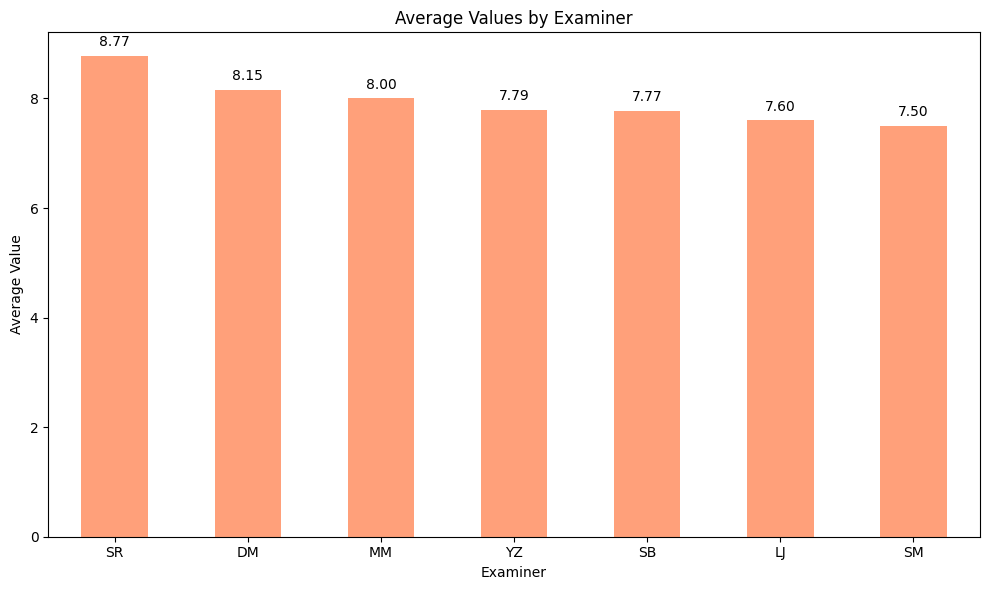

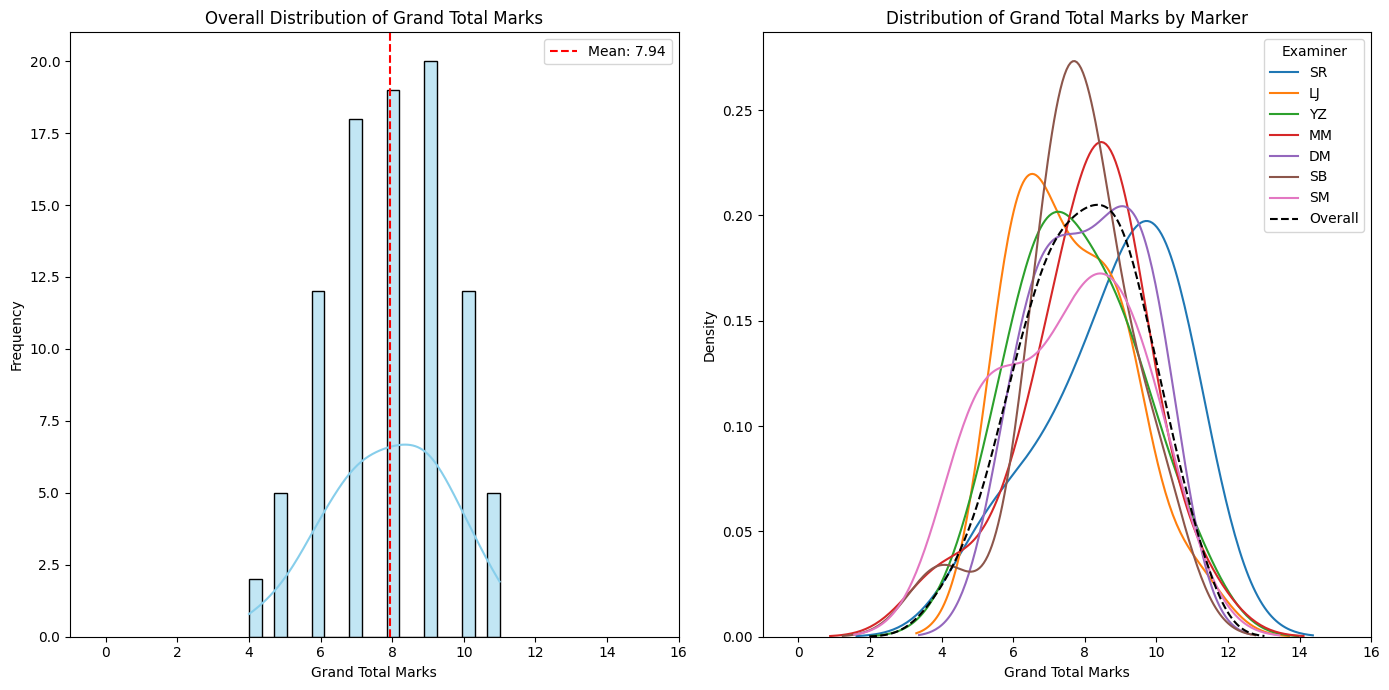

['SR' 'LJ' 'YZ' 'MM' 'DM' 'SB' 'SM']


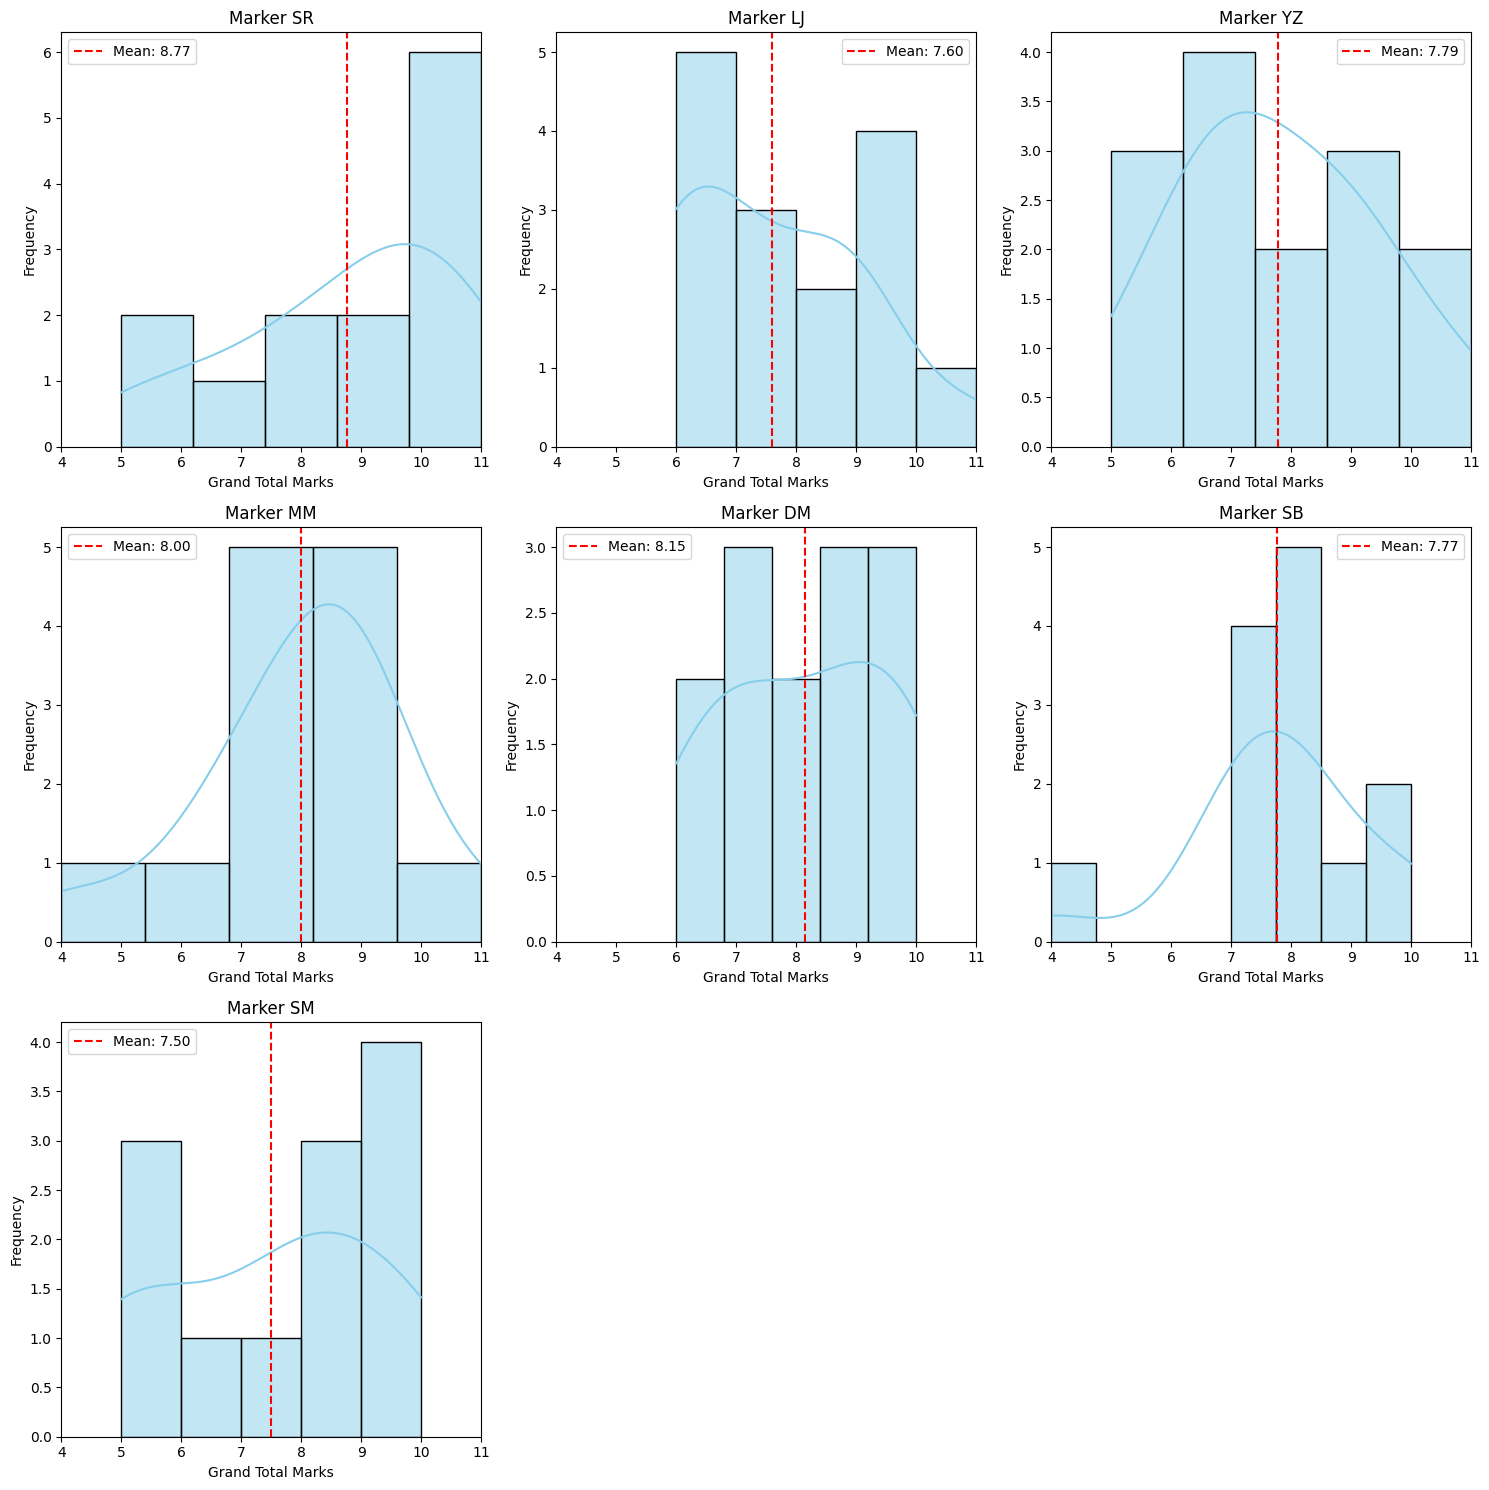

            Average  Std Deviation  count
Examiner                                 
DM        15.461538       2.145359     13
LJ        14.866667       2.065591     15
MM        15.307692       2.136376     13
SB        14.384615       2.467741     13
SM        14.166667       2.657180     12
SR        16.615385       2.103111     13
YZ        15.000000       1.839732     14


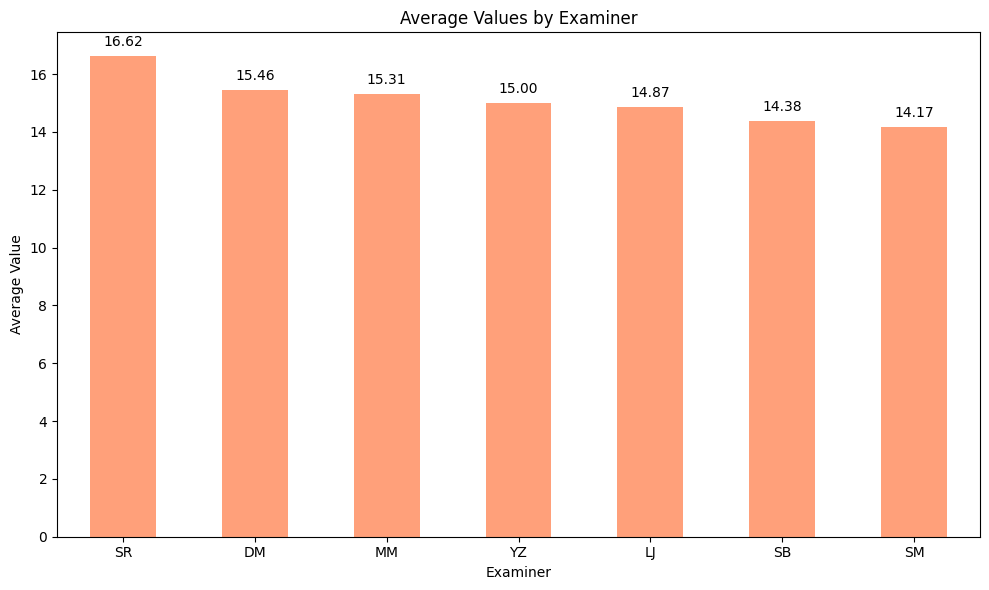

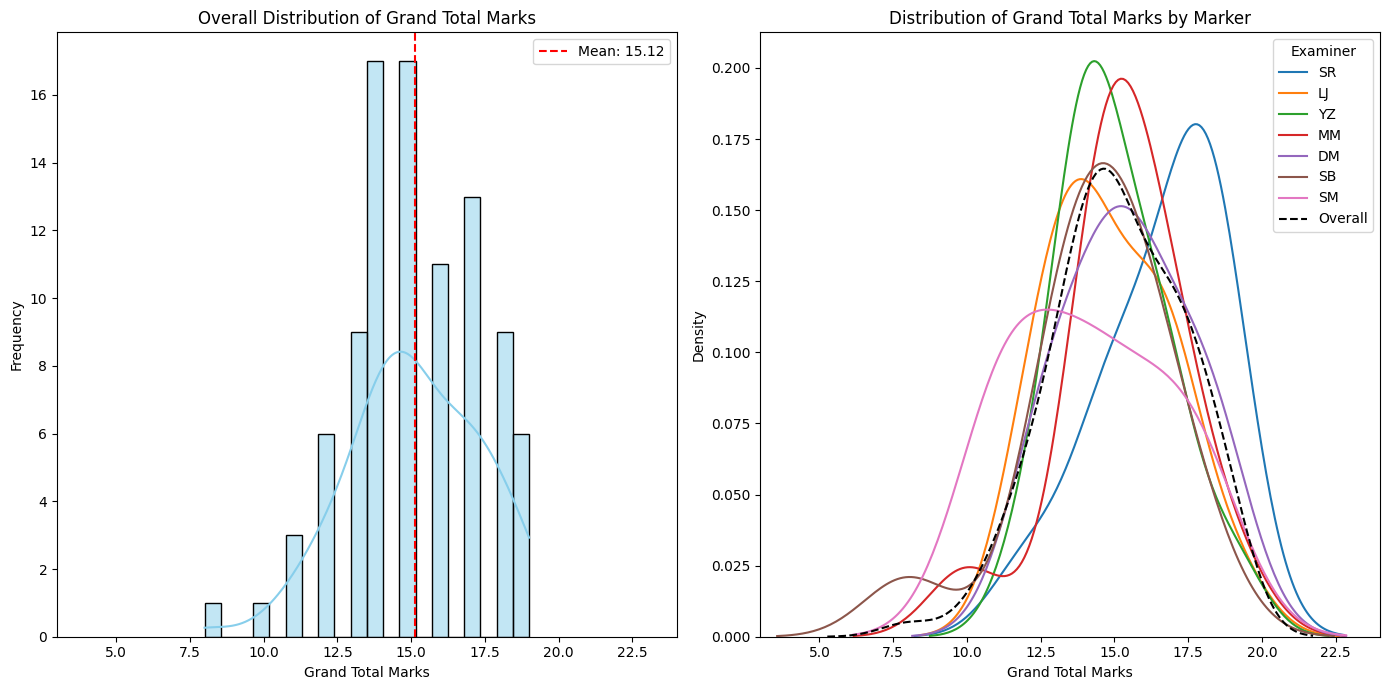

['SR' 'LJ' 'YZ' 'MM' 'DM' 'SB' 'SM']


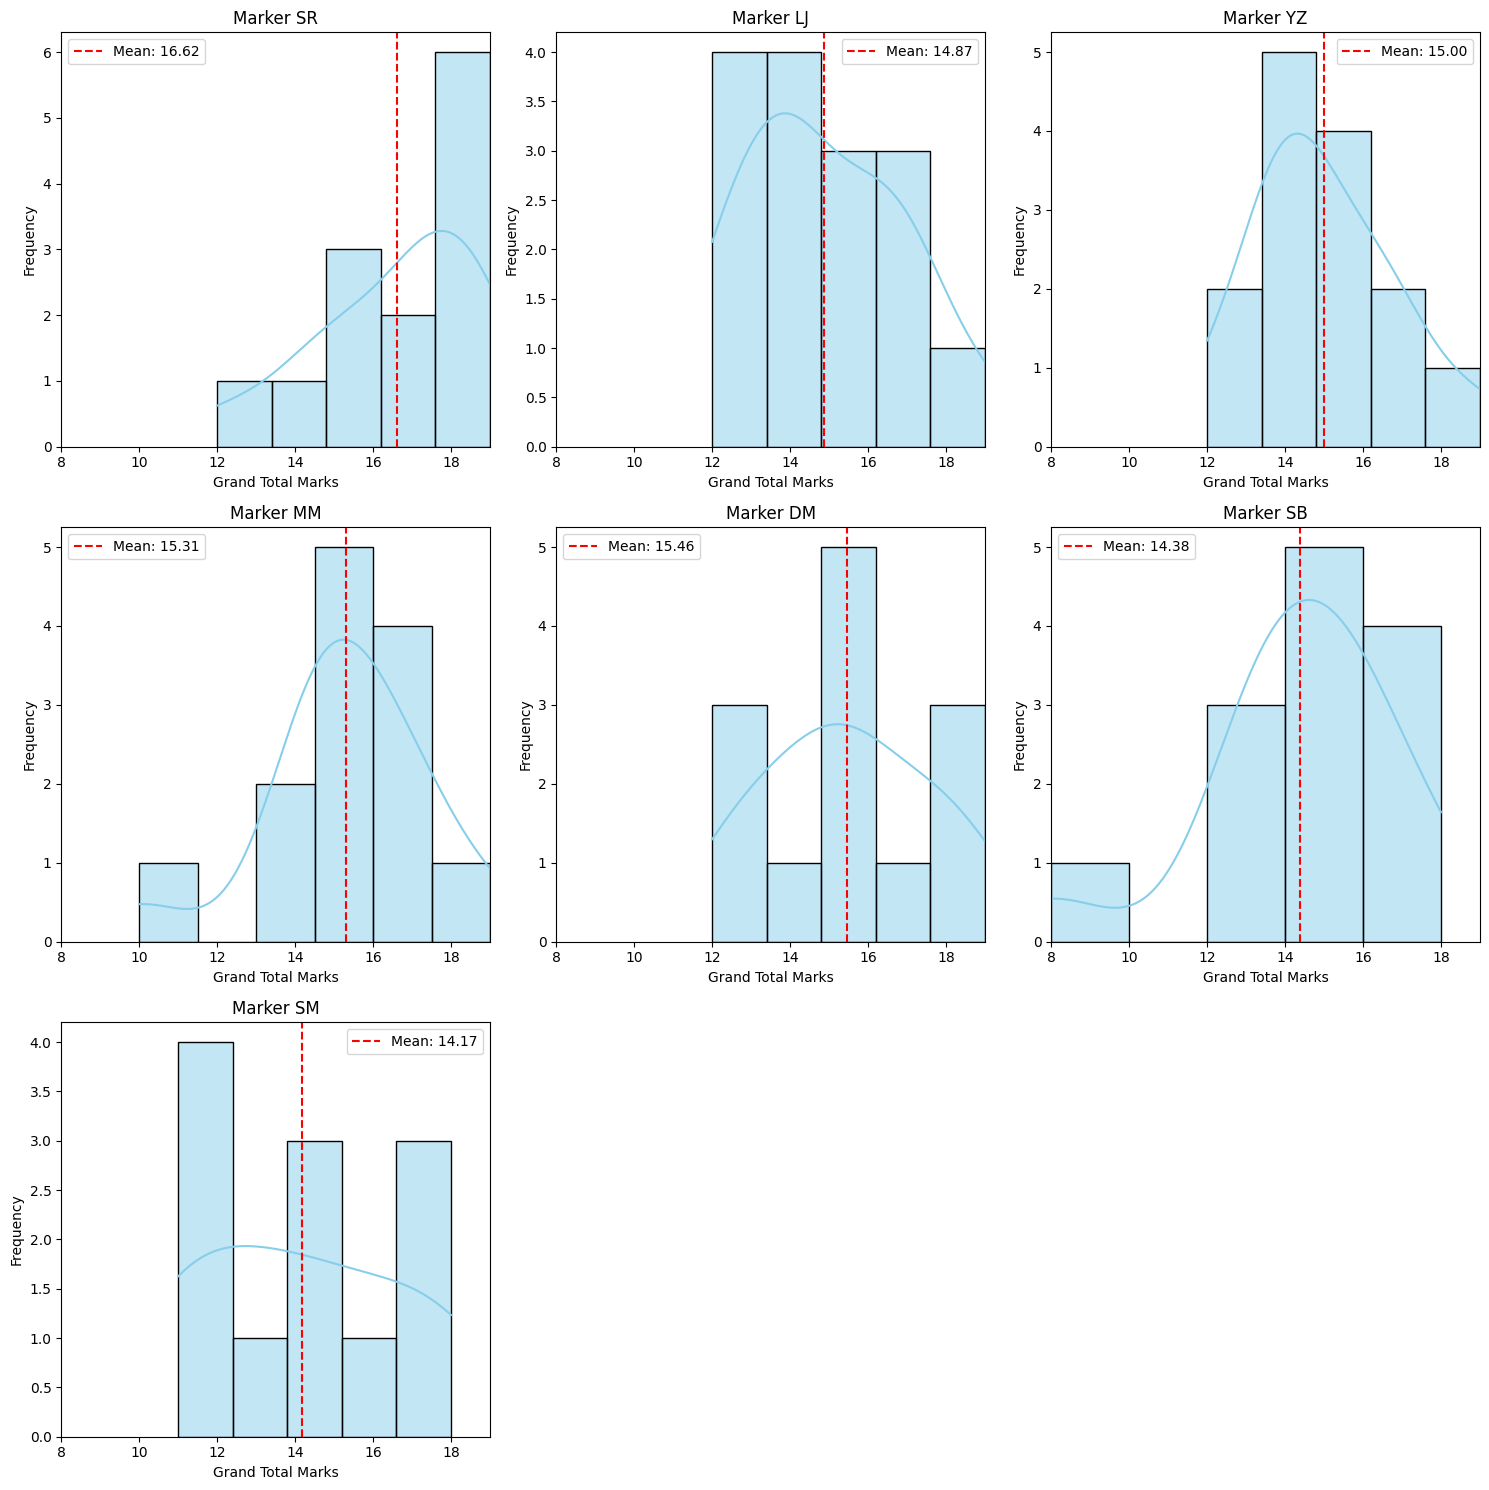

In [12]:
# Overall aggregate, average of grand total for all
def plot_distribution(df, totalColumn='Grand Total'):
    df = df.iloc[:-1]
    overall_stats = {
        'Average': df[totalColumn].mean(),
        'Std': df[totalColumn].std()
    }
    marker_stats = df.groupby('Examiner')[totalColumn].agg(['mean', 'std', 'count']).rename(columns={'mean': 'Average', 'std': 'Std Deviation'})
    print(marker_stats)
    marker_stats = marker_stats.sort_values(by='Average', ascending=False)
    ax = marker_stats['Average'].plot(kind='bar', figsize=(10, 6), color='#FFA07A', rot=0)

    # Setting titles and labels
    plt.title('Average Values by Examiner')
    plt.xlabel('Examiner')
    plt.ylabel('Average Value')
    plt.xticks(rotation=0)  # Adjust the rotation if needed for better label visibility

    # Optional: Adding value annotations on each bar
    for p in ax.patches:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points')

    plt.tight_layout()  # Adjust layout to make room for label rotation if necessary
    plt.show()
    
    
    plt.figure(figsize=(14, 7))
    # Overall distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[totalColumn], kde=True, color="skyblue", bins=20)
    plt.title('Overall Distribution of Grand Total Marks')
    plt.xlabel('Grand Total Marks')
    plt.xlim(df[totalColumn].min() - 5, df[totalColumn].max() + 5)
    plt.ylabel('Frequency')
    plt.axvline(df[totalColumn].mean(), color='r', linestyle='--', label=f"Mean: {overall_stats['Average']:.2f}")
    # plt.axvline(df[totalColumn].mean() + df[totalColumn].std(), color='g', linestyle='--', label=f"+1 Std Dev: {(df[totalColumn].mean() + df[totalColumn].std()):.2f}")
    # plt.axvline(df[totalColumn].mean() - df[totalColumn].std(), color='g', linestyle='--', label=f"-1 Std Dev: {(df[totalColumn].mean() - df[totalColumn].std()):.2f}")
    plt.legend()

    plt.subplot(1, 2, 2)
    for marker in df['Examiner'].unique():
        sns.kdeplot(df[df['Examiner'] == marker][totalColumn], label=marker)
    sns.kdeplot(df[totalColumn], color='black', label='Overall', linestyle='--')
    plt.title('Distribution of Grand Total Marks by Marker')
    plt.xlabel('Grand Total Marks')
    plt.ylabel('Density')
    plt.legend(title='Examiner')
    plt.xlim(df[totalColumn].min() - 5, df[totalColumn].max() + 5)
    plt.tight_layout()
    plt.show()

    markers = df['Examiner'].unique()
    print(markers)
    n_markers = len(markers)
    n_cols = 3
    n_rows = n_markers // n_cols + (n_markers % n_cols > 0)
    fig, axs = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 5))
    fig.subplots_adjust(hspace=0.4, wspace=0.4)

    for i, marker in enumerate(markers):
        ax = axs[i // n_cols, i % n_cols]
        sns.histplot(df[df['Examiner'] == marker][totalColumn], kde=True, color="skyblue", ax=ax)
        ax.set_title(f'Marker {marker}')
        ax.set_xlabel('Grand Total Marks')
        ax.set_ylabel('Frequency')
        ax.set_xlim(df[totalColumn].min(), df[totalColumn].max())
        # Add mean line
        ax.axvline(marker_stats.loc[marker, 'Average'], color='r', linestyle='--', label=f"Mean: {marker_stats.loc[marker, 'Average']:.2f}")
        ax.legend()

    # If the number of markers is not a multiple of the number of columns, hide the empty subplots
    for j in range(i + 1, n_rows * n_cols):
        fig.delaxes(axs.flatten()[j])

    plt.tight_layout()
    plt.show()

plot_distribution(df, 'Grand Total MC')
plot_distribution(df, 'Grand Total')
# overall_stats, marker_stats

In [13]:
import pandas as pd
from collections import defaultdict
from itertools import combinations

# Sample DataFrame
# df = pd.DataFrame({
#     'StudentID': [1, 1, 2, 2, 3, 3, 4, 4],
#     'Examiner': ['A', 'B', 'A', 'C', 'B', 'C', 'A', 'C']
# })

# Initialize dictionary to count pairs
pairCount = defaultdict(int)

# Get all unique students
allStudents = df['StudentID'].unique()

# Iterate over all students to get pairs of markers
for student in allStudents:
    # Get markers for the current student
    studentData = df[df['StudentID'] == student]
    markers = studentData['Examiner'].unique()
    
    # Generate all possible pairs of markers
    for pair in combinations(markers, 2):
        sortedPair = tuple(sorted(pair))
        pairCount[sortedPair] += 1

# Convert to DataFrame for easier display
pairCountDf = pd.DataFrame(pairCount.items(), columns=['MarkerPair', 'Count'])
pairCountDf    
# from IPython.display import display

# display(pairCountDf.style.hide(axis='index'))

,MarkerPair,Count
0,"(SR, YZ)",6
1,"(SM, SR)",6
2,"(LJ, YZ)",1
3,"(MM, YZ)",7
4,"(DM, LJ)",7
5,"(SB, SM)",6
6,"(DM, MM)",6
7,"(LJ, SB)",7


In [14]:
# df =df.drop(['534_R', '524_R', '534_ES', '534_PS', '534_TM', '524_ES', '524_PS', '524_TM'], axis=1)
def getWeighted(df):
    weights = [0.8, 0.1, 0.05, 0.05]

    df[f'Weighted'] = (df[colsmc].sum(axis=1)*weights[0]/len(colsmc) + 
                               df[colstm].sum(axis=1)*weights[1]/len(colstm)+ 
                               df[colses].sum(axis=1)*weights[2]/len(colses) + 
                               df[colsps].sum(axis=1)*weights[3]/len(colsps))*100
    df[f'Weighted'] = df[f'Weighted'].apply(lambda x: round(x, 2))

    # Penalize for critical errors by reducing the weighted score by 10%
    df['Weighted_penalty_10']= df[f'Weighted'] * df[f'{subjectCode}_CE'].apply(lambda x: 0.9 if x == 'Yes' else 1.0)
    df['Weighted_penalty_10'] = df['Weighted_penalty_10'].apply(lambda x: round(x, 2))
    # Penalize for critical errors by 20%
    df['Weighted_penalty_20']= df[f'Weighted'] * df[f'{subjectCode}_CE'].apply(lambda x: 0.8 if x == 'Yes' else 1.0)
    df['Weighted_penalty_20'] = df['Weighted_penalty_20'].apply(lambda x: round(x, 2))

getWeighted(df_best)
comments = df_best.pop('Comments')
df_best['Comments'] = comments
saveDf(df_best, f'{dir_name}/{file_name} filtered_best_penalty.xlsx', 'Best')
df_best.tail()


2 OR($V2="Yes", $V2="Yes")
3 OR($V3="Yes", $V3="Yes")
4 OR($V4="Yes", $V4="Yes")
5 OR($V5="Yes", $V5="Yes")
6 OR($V6="Yes", $V6="Yes")
7 OR($V7="Yes", $V7="Yes")
8 OR($V8="Yes", $V8="Yes")
9 OR($V9="Yes", $V9="Yes")
10 OR($V10="Yes", $V10="Yes")
11 OR($V11="Yes", $V11="Yes")
12 OR($V12="Yes", $V12="Yes")
13 OR($V13="Yes", $V13="Yes")
14 OR($V14="Yes", $V14="Yes")
15 OR($V15="Yes", $V15="Yes")
16 OR($V16="Yes", $V16="Yes")
17 OR($V17="Yes", $V17="Yes")
18 OR($V18="Yes", $V18="Yes")
19 OR($V19="Yes", $V19="Yes")
20 OR($V20="Yes", $V20="Yes")
21 OR($V21="Yes", $V21="Yes")
22 OR($V22="Yes", $V22="Yes")
23 OR($V23="Yes", $V23="Yes")
24 OR($V24="Yes", $V24="Yes")
25 OR($V25="Yes", $V25="Yes")
26 OR($V26="Yes", $V26="Yes")
27 OR($V27="Yes", $V27="Yes")
28 OR($V28="Yes", $V28="Yes")
29 OR($V29="Yes", $V29="Yes")
30 OR($V30="Yes", $V30="Yes")
31 OR($V31="Yes", $V31="Yes")
32 OR($V32="Yes", $V32="Yes")
33 OR($V33="Yes", $V33="Yes")
34 OR($V34="Yes", $V34="Yes")
35 OR($V35="Yes", $V35="Yes")
36 O

,531_TM-3,531_ES-1,531_MC10,531_PS-1,531_TM-1,531_TM-2,531_PS-2,531_MC5,531_ES-2,531_MC8,531_MC7,531_MC3,531_MC11,531_MC1,531_MC4,531_ES-3,531_MC2,531_MC9,531_MC6,531_ES-4,531_CE,Grand Total,Weighted,Weighted_penalty_10,Weighted_penalty_20,Comments
StudentID,,,,,,,,,,,,,,,,,,,,,,,,,,
1625104,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,No,13.0,61.14,61.14,61.14,"All caries left behind, cavity did not extend ..."
1616141,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,Yes,13.0,61.14,55.03,48.91,Watch posture; safety with sharps and making s...
1605538,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Yes,13.0,67.16,60.44,53.73,- mannequin positioned very high\n- dental dam...
1615131,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,Yes,12.0,59.89,53.90,47.91,Unsure what has occurred with your preparation...
Column Total,47.0,47.0,47.0,47.0,47.0,47.0,46.0,45.0,44.0,44.0,42.0,40.0,39.0,38.0,37.0,35.0,32.0,31.0,30.0,1.0,NaN,NaN,3952.16,3952.16,3952.16,NaN
